Text(0.5, 1.0, 'Model vs Data')

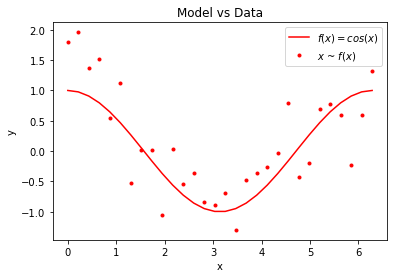

In [204]:
import numpy as np
import matplotlib.pyplot as plt

X_t=np.linspace(0,2*np.pi,30)#X_train data
mu,sigma=0,0.5
e_t=np.random.normal(mu,sigma,30)#epsilon_train
Y_t=np.cos(X_t)+e_t#Y_train

X_v=np.linspace(0,2*np.pi,15)#X_valid data
e_v=np.random.normal(mu,sigma,15)#epsilon_valid
Y_v=np.cos(X_v)+e_v#Y_valid

plt.plot(X_t,np.cos(X_t),'r-',label='$f(x)=cos(x)$')
plt.plot(X_t,Y_t,'r.',label='$x$ ~ $f(x)$')
plt.legend(loc='upper right')
ax = plt.gca()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Model vs Data')



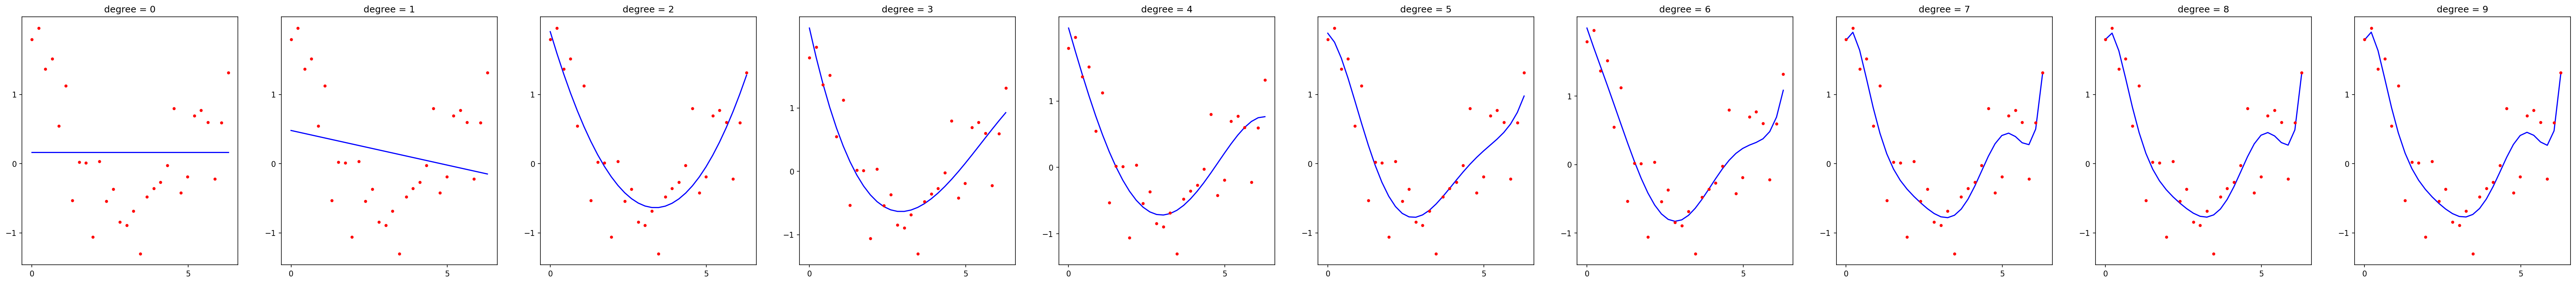

In [214]:
mse_t=[]
mse_v=[]

y_t=Y_t.T.reshape(30,1)#polynomial y train matrix
y_v=Y_v.T.reshape(15,1)#polynomial y valid matrix
f, axes = plt.subplots(nrows=1, ncols=10, figsize=(60,6), dpi=150)

for i in range(1,11):
    x_t=np.flip(np.vander(X_t,i),axis=1)#polynomial x_train matrix
    x_v=np.flip(np.vander(X_v,i),axis=1)#polynomial x_valid matrix
    
    w=np.linalg.inv(x_t.T@x_t)@x_t.T@y_t #w_OLS
    
    y_pt=x_t@w#Y_train prediction
    y_pv=x_v@w#Y_valid prediction
   
    
    mse_t.append(np.mean((y_pt-y_t)**2))#MSE_train
    mse_v.append(np.mean((y_pv-y_v)**2))#MSE_valid

    #plot each result graph
    axes[i-1].plot(X_t,y_pt,'b-')
    axes[i-1].plot(X_t,y_t,'r.')
    axes[i-1].set_xticks([0,5])
    axes[i-1].set_yticks([-1,0,1])
    axes[i-1].set_title('degree = {}'.format(i-1))



Text(0, 0.5, 'log(MSE)')

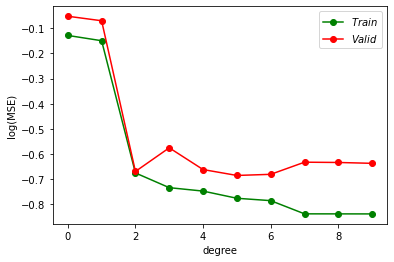

In [215]:
mse_t=np.log10(mse_t)#log(MSE_train)
mse_v=np.log10(mse_v)#log(MSE_valid)

deg=np.arange(10)#x-axis

plt.plot(deg,mse_t,'g-o',label='$Train$')
plt.plot(deg,mse_v,'r-o',label='$Valid$')
plt.legend(loc='upper right')
ax = plt.gca()
ax.set_xlabel('degree')
ax.set_ylabel('log(MSE)')